# Reference
- [python-generator-yield](http://kissg.me/2016/04/09/python-generator-yield/)
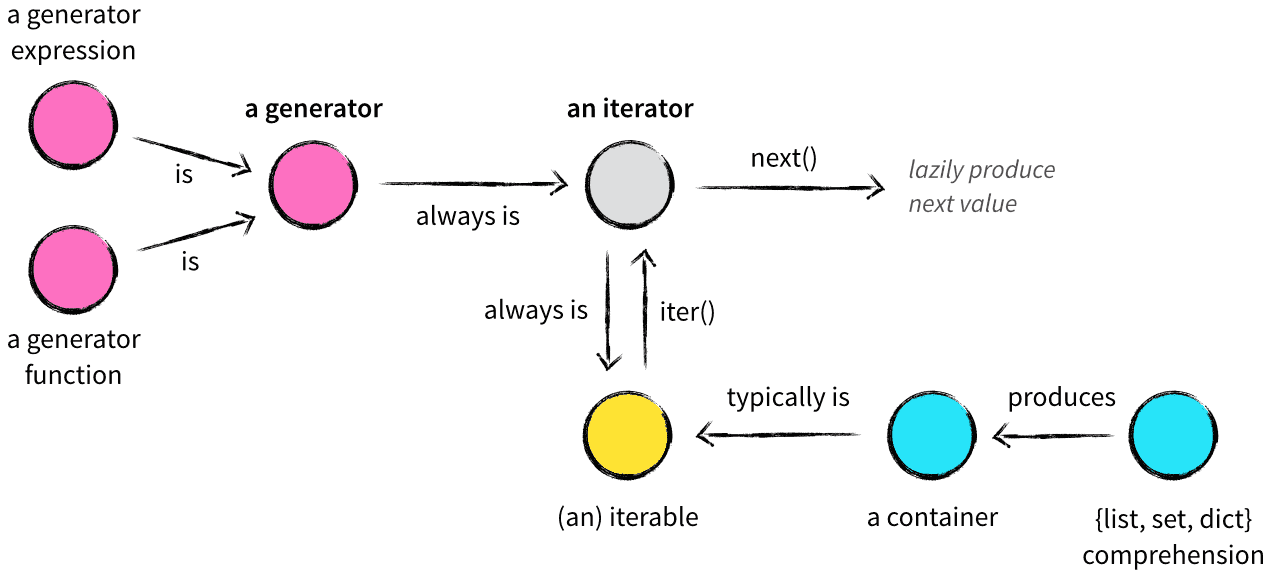

# [Iteration/ Iterable/ Iterator ?](https://docs.python.org/3/glossary.html#term-iterable)
- `Iteration`:   
Iteration is the repetition of a process in order to generate a (possibly unbounded) sequence of outcomes. The sequence will approach some end point or end value. Each repetition of the process is a single iteration, and the outcome of each iteration is then the starting point of the next iteration.
- `Iterable`:  
Iterable is an instance which is implemented a `__iter__()` method to create a `iterator` object.  
In the ohter words, iterable is a container instance which implemented `__iter__()` method.
- `Iterator`:  
Iterator is an instance which is implemented both `__iter__()` and `__next__()` methods.   
- `__iter__()` is simply return iterator itself.(`iterator.__iter__()` will return iterator).  
Due to this `__iter__()` to implement python for in iteration.  
- `__next__()` is a key method to distinguish iterable and iterator.  
`__next__()` could get a single element form container explicitly.  
Actually, it execute 2 process.  
1.Update iterator status, and point to next element(or result).  
2.Return current element(or result).

# How for ... in  works ?
When using `for in` syntax on a container(or iterable), actually calling this `__iter__()` method to return a iterator. Once we get itertor, then keep calling `__next__()` to iterate all element until stop.
- Basic 2 methods, `__iter__ and __next__`
1. `__iter__`: Return a iterator object(self)
2. `__next__`: Execute iteration behavior(element or some result) of this return iterator object 
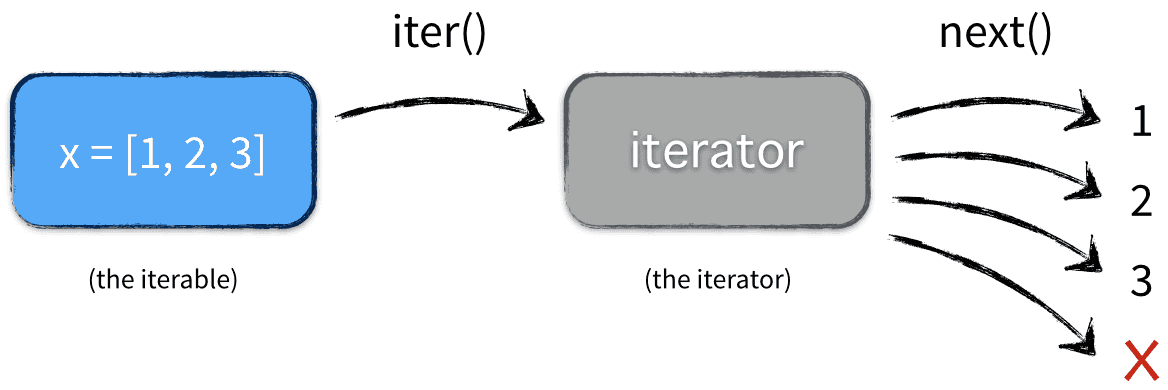

In [175]:
from collections import Iterable, Iterator
my_list = list(range(0, 10)) #list is a iterable
print(my_list)
my_list_iterator = iter(my_list)
print('\nmy_list(container):', type(my_list))
print('my_list_iterator(container.iter()):', my_list_iterator)
print('\nmy_list is iterable(container):', isinstance(my_list, Iterable))
print('my_list is iterator(container):', isinstance(my_list, Iterator))
print('my_list_iterator is iterable:', isinstance(my_list_iterator, Iterable))
print('my_list_iterator is iterator:', isinstance(my_list_iterator, Iterator))
#iterator is iterable, but iterable is not iterator.

i = next(my_list_iterator)
print('\nnext:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)
i = next(my_list_iterator)
print('next:', i)

try:
    #iterator is consumable, after iterate all elements will stop iteration.
    i = next(my_list_iterator)
    print('next:', i)
    i = next(my_list_iterator)
    print('next:', i)
except StopIteration as e:
    print(e)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

my_list(container): <class 'list'>
my_list_iterator(container.iter()): <list_iterator object at 0x7f855ca28240>

my_list is iterable(container): True
my_list is iterator(container): False
my_list_iterator is iterable: True
my_list_iterator is iterator: True

next: 0
next: 1
next: 2
next: 3
next: 4
next: 5
next: 6
next: 7
next: 8
next: 9



In [176]:
#iterator is consumable, after iterate all elements will stop iteration.

a = [1, 2, 3]
b = iter(a) #b is iterator instance of container a(list) 
print('b:', b)
c = list(b) # iterator all element to c (list)
print('c:', c)
print('b:', list(b)) # b is empty

b: <list_iterator object at 0x7f855e414c88>
c: [1, 2, 3]
b: []


# [Generator](https://docs.python.org/3/glossary.html#term-generator)

- `Generator:` A function which returns a generator iterator.  

It looks like a normal function except that it contains yield expressions for producing a series of values usable in a for-loop or that can be retrieved one at a time with the next() function.  

Usually refers to a generator function, but may refer to a generator iterator in some contexts. In cases where the intended meaning isn’t clear, using the full terms avoids ambiguity.
- `Generator iterator:` An object created by a generator funcion.  

Each yield temporarily suspends processing, remembering the location execution state (including local variables and pending try-statements). When the generator iterator resumes, it picks up where it left off (in contrast to functions which start fresh on every invocation).
- `Generator expression:` An expression that returns an iterator.  

It looks like a normal expression followed by a for clause defining a loop variable, range, and an optional if clause. The combined expression generates values for an enclosing function:

- Replace python function keyword `return` to `yield`, then function would be generator
- iter(Next(Generator)) will return finite element as generator define


#### Python’s generators provide a convenient way to implement the iterator protocol.

In [177]:
from collections import Generator

def g():
    print('1 is ')
    yield 1
    print('2 is ')
    yield 2
    print('3 is ')
    yield 3
    print('4 is ')
    yield 4


In [178]:
a = g()
print(a)
print('a is generator:', isinstance(a, Generator))
print('a is also a iterator:', isinstance(a, Iterator))
b = next(a)
print(b)
b = next(a)
print(b)
b = next(a)
print(b)
b = next(a)
print(b)

<generator object g at 0x7f855e4289e8>
a is generator: True
a is also a iterator: True
1 is 
1
2 is 
2
3 is 
3
4 is 
4


# Send() method for Generator
- There's a another way to using generator by method `send()`.


In [179]:
def echo(value=None):
    while(1):
        print('before_yield_value:', value)
        value = (yield value)
        print('value:', value)

        if value:
            print('if value:', value)
            value+=1
            print('value+=:', value)

In [180]:
g = echo(1)
print('Start\n1st:')
print('next(g)=', next(g)) #yield = None when calling next(), so assign value None
print('2nd:')
print('next(g)=', next(g))    #yield = None 
print('3rd')
print('g.send(2)=', g.send(2))
#print('\n2nd g.send(3)=', g.send(3))
print('4th:')
print('g.send(5)=', g.send(5))


Start
1st:
before_yield_value: 1
next(g)= 1
2nd:
value: None
before_yield_value: None
next(g)= None
3rd
value: 2
if value: 2
value+=: 3
before_yield_value: 3
g.send(2)= 3
4th:
value: 5
if value: 5
value+=: 6
before_yield_value: 6
g.send(5)= 6


# Yield expressions
The yield expression is used when defining a generator function or an asynchronous generator function and thus can only be used in the body of a function definition.  
Using a yield expression in a function’s body causes that function to be a generator, and using it in an async def function’s body causes that coroutine function to be an asynchronous generator

def gen():  # defines a generator function
    yield 123

async def agen(): # defines an asynchronous generator function
    yield 123
    
When a generator function is called, it returns an iterator known as a generator. That generator then controls the execution of the generator function. The execution starts when one of the generator’s methods is called. At that time, the execution proceeds to the first yield expression, where it is suspended again, returning the value of expression_list to the generator’s caller. By suspended, we mean that all local state is retained, including the current bindings of local variables, the instruction pointer, the internal evaluation stack, and the state of any exception handling. When the execution is resumed by calling one of the generator’s methods, the function can proceed exactly as if the yield expression were just another external call. The value of the yield expression after resuming depends on the method which resumed the execution. If __next__() is used (typically via either a for or the next() builtin) then the result is None. Otherwise, if send() is used, then the result will be the value passed in to that method.    
    

In [181]:
# Yield expression example
def gen():  # defines a generator function
    yield 123

async def agen(): # defines an asynchronous generator function
    yield 123

In [182]:
def echo(value=None):
    print("Execution starts when 'next()' is called for the first time.")
    try:
        while True:
            try:
                value = (yield value)
            except Exception as e:
                value = e
    finally:
        print("Don't forget to clean up when 'close()' is called.")

generator = echo(1)
print(next(generator))
print(next(generator))
print(generator.send(2))
generator.throw(TypeError, "spam")
generator.close()


Execution starts when 'next()' is called for the first time.
1
None
2
Don't forget to clean up when 'close()' is called.


# Practice:
- A Generator readout each element in list 

In [183]:
def list_gen(my_list):
    for i in my_list:
        yield i

list_g = list_gen(list(range(5)))
a = next(list_g)
b = next(list_g)
b = next(list_g)
b = next(list_g)
b = next(list_g)
print(a, b)

0 4


# Non-stop list generator

In [184]:
def non_stop_list_gen(my_list):
    while(1):
        for i in my_list:
            yield i

list_g = non_stop_list_gen(list(range(5)))
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
a = next(list_g)
print(a)

4


# Cat & Dog dataset from kaggle

In [185]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
%matplotlib inline
print(os.listdir('../input/'))
train_dog_dir = '../input/training_set/training_set/dogs/'
train_cat_dir = '../input/training_set/training_set/cats/'
test_dog_dir = '../input/test_set/test_set/dogs/'
test_cat_dir = '../input/test_set/test_set/cats/'

['training_set', 'test_set']


In [186]:
def img_gen(img_dir, batch_size, initial_shuffle=True):
    img_list = pd.DataFrame(os.listdir(img_dir), columns=['filename'])
    img_list['filepath'] = img_dir + img_list['filename']
    img_list_ = img_list['filepath'].values
    if initial_shuffle:
        np.random.shuffle(img_list_)
    idx = 0
    while(1):
        yield list(img_list_[idx:idx+batch_size])
        idx += batch_size

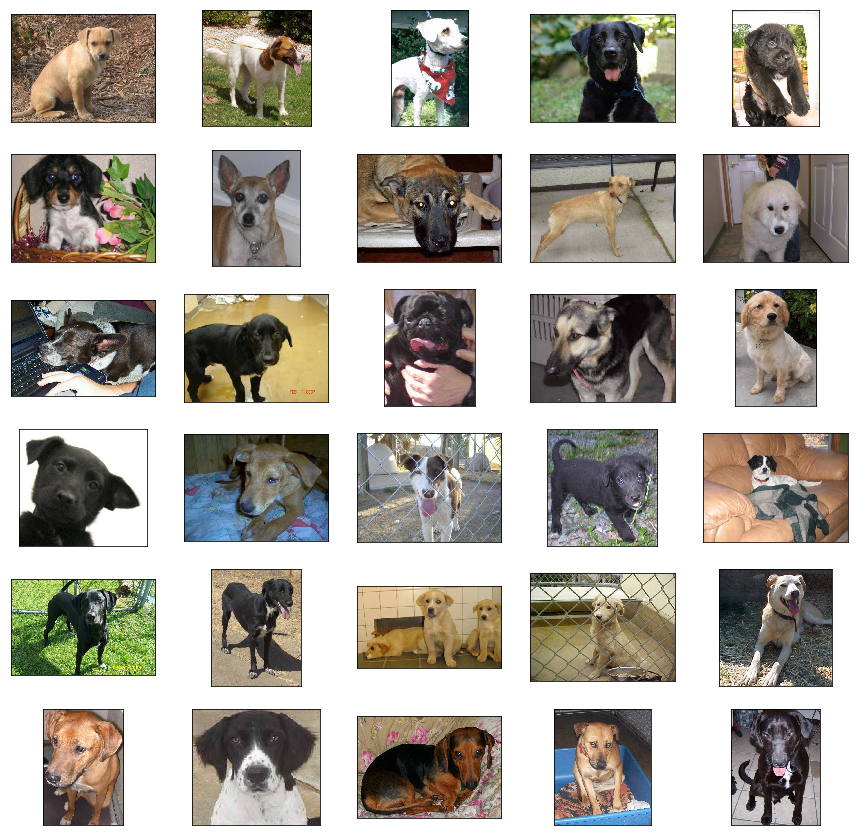

In [187]:
def show_img(your_generator, batch_size):
    fig = plt.figure(figsize=(15, 15))
    batch_img_dir = next(your_generator)
    for idx, img_file in enumerate(batch_img_dir):
        ax = fig.add_subplot(batch_size//5, 5, idx+1, xticks=[], yticks=[])
        img = Image.open(img_file)
        ax.imshow(img)
        
batch_size = 30
show_img(img_gen(test_dog_dir, batch_size), batch_size)

# Cifar10 using generator

In [241]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [242]:
def data_gen(img_array, target_array, batch_size=32):
    while(1):
        for idx in range(0, len(img_array), batch_size):
            yield img_array[idx:idx+batch_size], target_array[idx:idx+batch_size]

In [243]:
x_test_g = data_gen(x_test, y_test)

In [244]:
next(x_test_g)[1].shape

(32, 1)

In [245]:
def show_pic(gen, n_col):
    img_array, target_array = next(gen)
    fig = plt.figure(figsize=(15, 10))
    for idx, img_file in enumerate(range(len(img_array))):
        ax = fig.add_subplot(len(img_array)//n_col + 1, n_col, idx+1, xticks=[], yticks=[])
        ax.imshow(img_array[idx])
        ax.set_title(str(target_array[idx]))

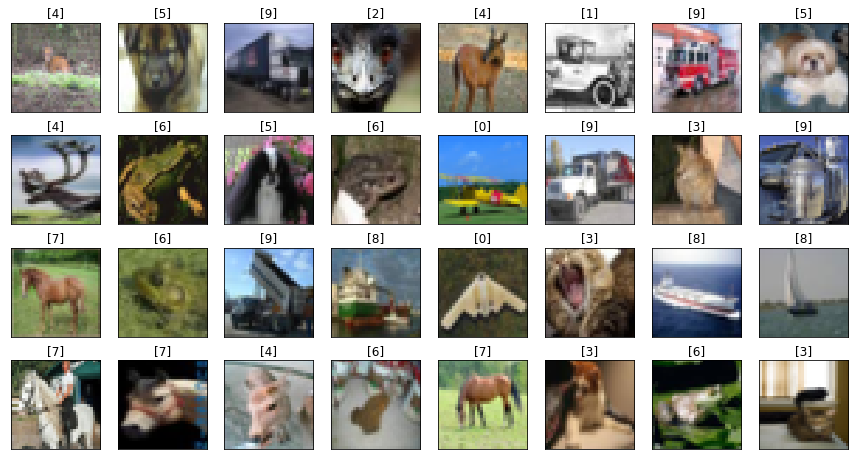

In [246]:
show_pic(x_test_g, 8)

In [247]:
#preprocessing
def preprocessing(x):
    return x/255.
def label_OHE(y, num_cls):
    return keras.utils.to_categorical(y, num_cls)

x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = label_OHE(y_train, 10)
y_test = label_OHE(y_test, 10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


In [248]:
#create CNN model
keras.backend.clear_session()
input_layer = keras.layers.Input(x_train[0].shape)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid')(input_layer)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='valid')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D((2, 2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='valid')(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D((2, 2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
output_layer = keras.layers.Dense(10, activation='softmax')(x)

model_cnn = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model_cnn.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       1179904   
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       295040    
__________

In [250]:
from math import ceil
EPOTCH = 100
BATCH_SIZE = 25
LERANING_RATE = 1e-3
train_generator = data_gen(x_train, y_train, BATCH_SIZE)
test_generator = data_gen(x_test, y_test, BATCH_SIZE)
OPTIMIZER = keras.optimizers.adam(lr=LERANING_RATE)
lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='cirfar10_cnn.h5',
                                             save_best_only=True, verbose=1)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model_cnn.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=OPTIMIZER, metrics=['accuracy'])

history = model_cnn.fit_generator(train_generator, steps_per_epoch=ceil(len(x_train)/BATCH_SIZE),
                        epochs=EPOTCH, verbose=1, callbacks=[lr_reducer, checkpoint, early_stop],
                        validation_data=test_generator, validation_steps=ceil(len(x_test)/BATCH_SIZE))

'''
history = model_cnn.fit(x_train, y_train, epochs=EPOTCH, verbose=1, validation_data=(x_test, y_test),
              callbacks=[lr_reducer, checkpoint, early_stop],
             )
'''

Epoch 1/100
2000/2000 [==============================] - 35s 18ms/step - loss: 1.3912 - acc: 0.5203 - val_loss: 1.0791 - val_acc: 0.6290

Epoch 00001: val_loss improved from inf to 1.07906, saving model to cirfar10_cnn.h5
Epoch 2/100
2000/2000 [==============================] - 34s 17ms/step - loss: 0.8968 - acc: 0.6842 - val_loss: 0.9342 - val_acc: 0.6813

Epoch 00002: val_loss improved from 1.07906 to 0.93424, saving model to cirfar10_cnn.h5
Epoch 3/100
2000/2000 [==============================] - 34s 17ms/step - loss: 0.7193 - acc: 0.7459 - val_loss: 0.9779 - val_acc: 0.6813

Epoch 00003: val_loss did not improve from 0.93424
Epoch 4/100
2000/2000 [==============================] - 35s 17ms/step - loss: 0.5871 - acc: 0.7945 - val_loss: 1.0752 - val_acc: 0.6653

Epoch 00004: val_loss did not improve from 0.93424
Epoch 5/100
2000/2000 [==============================] - 34s 17ms/step - loss: 0.4751 - acc: 0.8324 - val_loss: 1.0018 - val_acc: 0.7105

Epoch 00005: val_loss did not improv

'\nhistory = model_cnn.fit(x_train, y_train, epochs=EPOTCH, verbose=1, validation_data=(x_test, y_test),\n              callbacks=[lr_reducer, checkpoint, early_stop],\n             )\n'

In [251]:
valid_loss, valid_acc = model_cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 207us/step


Text(0.5, 1.0, 'Accuracy')

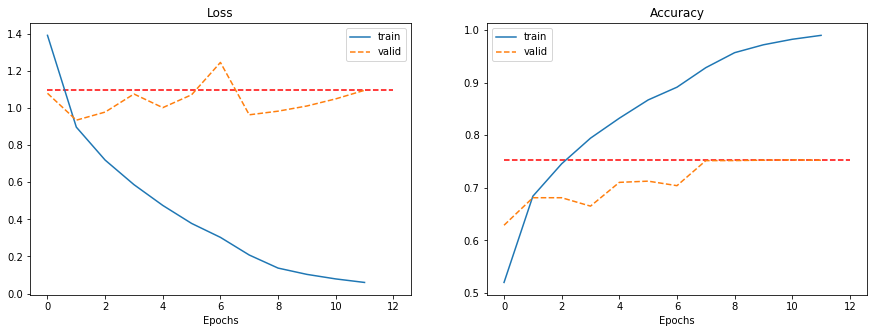

In [254]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(len(history.history['loss'])), history.history['loss'], label='train')
ax1.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='valid', linestyle='--')
ax1.hlines(valid_loss, 0, len(history.history['loss']), linestyle='--', color='r')
ax2.plot(range(len(history.history['acc'])), history.history['acc'], label='train')
ax2.plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='valid', linestyle='--')
ax2.hlines(valid_acc, 0, len(history.history['loss']), linestyle='--', color='r')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.set_title('Loss')
ax2.set_title('Accuracy')